In [3]:
from sympy import symbols, sinh, cosh, tanh, Symbol, simplify
import numpy as np
import sympy as sp
from IPython.display import display, Math

# Define your symbols
n, p, q, alpha_prime = symbols('n p q alpha_prime')
lamb = symbols('lamb')  # Original symbol for lambda

# Define the expressions using the original symbol
num = 1 + (
    (sinh(((n + 1) / 2 - q) * lamb) - sinh(((n + 1) / 2 - p) * lamb)) 
    / (sinh(((n + 1) / 2) * lamb) - sinh(((n - 1) / 2) * lamb))
)

#correct denominator
denom = ( 1 - 2*alpha_prime 
- (4 * alpha_prime * ( (tanh(lamb / 2)) / sinh(lamb * n) ) * sinh( ((q-p)/2) * lamb) ) 
* (
        (cosh((q - 1 / 2) * lamb) * sinh((n - ((p + q) / 2 - 1 / 2)) * lamb)) +
        (cosh((n - p + 1 / 2) * lamb) * sinh(((p + q) / 2 - 1 / 2) * lamb))
    )
)

c_analytical = num/denom

# New symbol for lambda (λ)
lambda_symbol = Symbol('lambda', real=True)

# Substitute lamb with the new lambda symbol
num_display = num.subs(lamb, lambda_symbol)
denom_display = denom.subs(lamb, lambda_symbol)
c_analytical_display = c_analytical.subs(lamb, lambda_symbol)

print('display:')
print('num:')
display(num_display)
print('denom')
display(denom_display)
print('c_analytical_start')
display(c_analytical_display)


display:
num:


1 + (-sinh(lambda*(n/2 - p + 1/2)) + sinh(lambda*(n/2 - q + 1/2)))/(-sinh(lambda*(n/2 - 1/2)) + sinh(lambda*(n/2 + 1/2)))

denom


-4*alpha_prime*(sinh(lambda*(p/2 + q/2 - 0.5))*cosh(lambda*(n - p + 0.5)) + sinh(lambda*(n - p/2 - q/2 + 0.5))*cosh(lambda*(q - 0.5)))*sinh(lambda*(-p/2 + q/2))*tanh(lambda/2)/sinh(lambda*n) - 2*alpha_prime + 1

c_analytical_start


(1 + (-sinh(lambda*(n/2 - p + 1/2)) + sinh(lambda*(n/2 - q + 1/2)))/(-sinh(lambda*(n/2 - 1/2)) + sinh(lambda*(n/2 + 1/2))))/(-4*alpha_prime*(sinh(lambda*(p/2 + q/2 - 0.5))*cosh(lambda*(n - p + 0.5)) + sinh(lambda*(n - p/2 - q/2 + 0.5))*cosh(lambda*(q - 0.5)))*sinh(lambda*(-p/2 + q/2))*tanh(lambda/2)/sinh(lambda*n) - 2*alpha_prime + 1)

# Comparing the starting formula with the actual values

In [4]:
num_eval = num.evalf(subs = {n: 7, p: 6, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) })
denom_eval = denom.evalf(subs = {n: 7, p: 6, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) })
c = num_eval/denom_eval
print(c)

4.06378273140094


Backsolving for the correct k_o

In [5]:
lamb_eval = 0.69
alpha_prime_eval = 1/(2 *cosh(lamb_eval))
k_o = float(alpha_prime_eval)
print(alpha_prime_eval)


0.400754765124285


In [6]:
from Ranking_exp import Ranking_exp
sim = Ranking_exp(n=7, k_o = k_o, k_s = 1, k_d = 0, p = 6, q = 2, c_reg = 1e10)
sim.calc_rank()
print(sim.a_exp_bar)

D_jq_analytical_sol: 0.2501398400642878
D_jp_analytical_sol: 0.017820532012786452
D_jq_analytical_sol: -0.6259679976865031
D_jp_analytical_sol: 0.026646891871847482
D_jq_analytical_sol: 0.18788747183811896
D_jp_analytical_sol: 0.04867123350932336
D_jq_analytical_sol: 0.09480202839013911
D_jp_analytical_sol: 0.09480202839013911
D_jq_analytical_sol: 0.04867123350932336
D_jp_analytical_sol: 0.18788747183811896
D_jq_analytical_sol: 0.026646891871847482
D_jp_analytical_sol: -0.6259679976865031
D_jq_analytical_sol: 0.017820532012786452
D_jp_analytical_sol: 0.2501398400642878
[1.50741469 5.32993035 5.23324142 5.23324142 5.32993035 1.50741469
 4.06378273]


In [7]:
np.testing.assert_almost_equal(c, sim.a_exp_bar[-1])
print('equal!')

equal!


# The starting formula is correct

# Checking the final formula for rank


Actually calc_rank_analytic already.  D_jp-D_jq
But calc_rank uses D_jq-D_jp
The issue is that they both get the right rank, but they shouldn't.

Write both out to see what's happening.  

In [8]:
import numpy as np
n = 7
j = 1
lamb = 0.69
r_j_til = (np.sinh(((n+1)/2)-j) * lamb) / \
    (np.sinh((n+1)/2) * lamb) - (np.sinh((n-1)/2) * lamb)
print(r_j_til)

print(sim.calc_rank())
print(sim.calc_rank_analytic())

np.testing.assert_almost_equal(sim.calc_rank(), sim.calc_rank_analytic())

-6.5452429954945615
D_jq_analytical_sol: 0.2501398400642878
D_jp_analytical_sol: 0.017820532012786452
D_jq_analytical_sol: -0.6259679976865031
D_jp_analytical_sol: 0.026646891871847482
D_jq_analytical_sol: 0.18788747183811896
D_jp_analytical_sol: 0.04867123350932336
D_jq_analytical_sol: 0.09480202839013911
D_jp_analytical_sol: 0.09480202839013911
D_jq_analytical_sol: 0.04867123350932336
D_jp_analytical_sol: 0.18788747183811896
D_jq_analytical_sol: 0.026646891871847482
D_jp_analytical_sol: -0.6259679976865031
D_jq_analytical_sol: 0.017820532012786452
D_jp_analytical_sol: 0.2501398400642878
[ 0.60410362 -0.09668893 -0.03874855 -0.          0.03874855  0.09668893
 -0.60410362]
D_jp_til_part_val: 1.6804429460896164
D_jq_til_part_val: 23.58772058378581
D_jp_til_part_val: 2.51275222586675
D_jq_til_part_val: 35.27052051243514
D_jp_til_part_val: 4.589606582426283
D_jq_til_part_val: 17.71743831679298
D_jp_til_part_val: 8.939654538309535
D_jq_til_part_val: 8.939654538309535
D_jp_til_part_val: 17

In [9]:
sim.calc_rank()

D_jq_analytical_sol: 0.2501398400642878
D_jp_analytical_sol: 0.017820532012786452
D_jq_analytical_sol: -0.6259679976865031
D_jp_analytical_sol: 0.026646891871847482
D_jq_analytical_sol: 0.18788747183811896
D_jp_analytical_sol: 0.04867123350932336
D_jq_analytical_sol: 0.09480202839013911
D_jp_analytical_sol: 0.09480202839013911
D_jq_analytical_sol: 0.04867123350932336
D_jp_analytical_sol: 0.18788747183811896
D_jq_analytical_sol: 0.026646891871847482
D_jp_analytical_sol: -0.6259679976865031
D_jq_analytical_sol: 0.017820532012786452
D_jp_analytical_sol: 0.2501398400642878


array([ 0.60410362, -0.09668893, -0.03874855, -0.        ,  0.03874855,
        0.09668893, -0.60410362])

In [10]:
sim.calc_rank_analytic()

D_jp_til_part_val: 1.6804429460896164
D_jq_til_part_val: 23.58772058378581
D_jp_til_part_val: 2.51275222586675
D_jq_til_part_val: 35.27052051243514
D_jp_til_part_val: 4.589606582426283
D_jq_til_part_val: 17.71743831679298
D_jp_til_part_val: 8.939654538309535
D_jq_til_part_val: 8.939654538309535
D_jp_til_part_val: 17.71743831679298
D_jq_til_part_val: 4.589606582426283
D_jp_til_part_val: 35.27052051243514
D_jq_til_part_val: 2.51275222586675
D_jp_til_part_val: 23.58772058378581
D_jq_til_part_val: 1.6804429460896164


array([ 0.60410362, -0.09668893, -0.03874855,  0.        ,  0.03874855,
        0.09668893, -0.60410362])

Big question is why does calc_rank use D_jp - D_jq and calc_rank_analytic as well as all of the other writing I have use D_jq - Djp

Best method to figure this out is just to rewrite the formalism I think.  

0.9824542681675227
[0.9824542681675227]
0.46905561684366626
[0.9824542681675227, 0.46905561684366626]
0.1879762735584102
[0.9824542681675227, 0.46905561684366626, 0.1879762735584102]
0.0
[0.9824542681675227, 0.46905561684366626, 0.1879762735584102, 0.0]
-0.1879762735584102
[0.9824542681675227, 0.46905561684366626, 0.1879762735584102, 0.0, -0.1879762735584102]
-0.46905561684366626
[0.9824542681675227, 0.46905561684366626, 0.1879762735584102, 0.0, -0.1879762735584102, -0.46905561684366626]
-0.9824542681675227
[0.9824542681675227, 0.46905561684366626, 0.1879762735584102, 0.0, -0.1879762735584102, -0.46905561684366626, -0.9824542681675227]


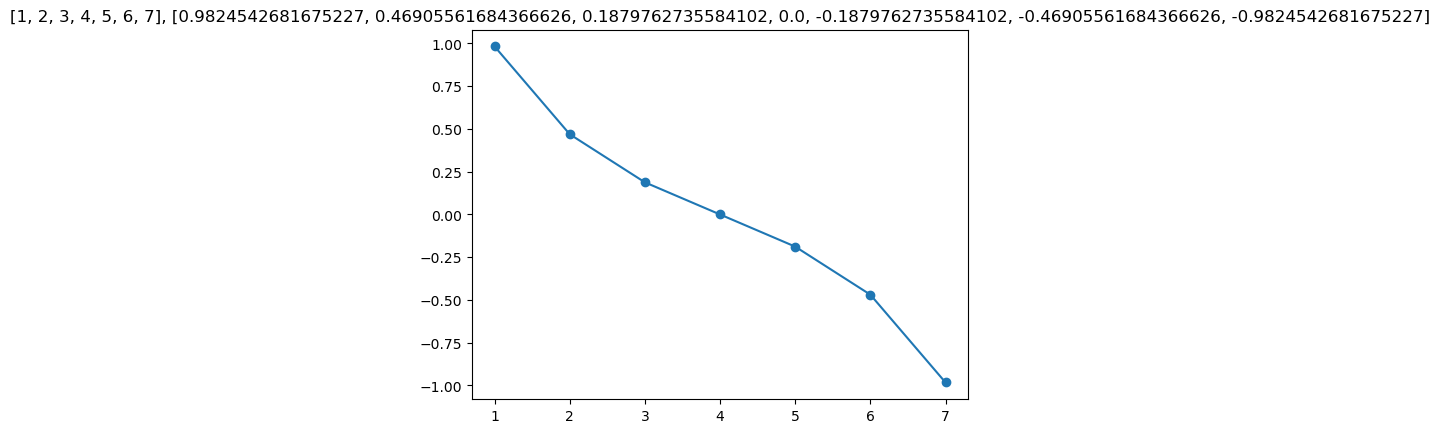

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def rank(i):
    num = np.sinh(( ((n+1)/2) - i) * lamb)
    denom = np.sinh(((n+1)/2) * lamb) - np.sinh(((n-1)/2) * lamb)
    return num / denom

def rank_array(n):
    ranks = []
    for i in range(1,n+1):
        ranks.append(rank(i))
        print(rank(i))
        print(ranks)
    return ranks

def plot_array(X,Y):
    plt.title(f'{X}, {Y}')
    plt.plot(X,Y, marker='o')

n=7

ranks = rank_array(n)
plot_array(list(range(1,n+1)), ranks)


In [38]:


import numpy as np

#set local parameters based on class parameters
n = 7
k_o = 0.4
k_s = 1
k_d = 0
p = 5
q = 3
c_reg = 1e10

alpha = 1 - (2 * ((k_o - k_d)/(k_s - k_d)))
alpha_prime = k_o/k_s
lamb_val = np.arccosh(1/(1-alpha))

K = {}
K_exp = {}
A = {}
arr_len = n-1
dual_len = (n-1) * 2
dual_len_exp = (n-1)*2 + 2
a = np.zeros(dual_len)
a_exp = np.zeros(dual_len_exp)
b = np.zeros(arr_len)
b_bar = np.zeros(arr_len)
c = np.zeros(1)
c_bar = np.zeros(1) 

def tridiag(n):
    arr_len = n-1
    diag_len = arr_len-1
    B = np.diag(np.ones((diag_len)), k=1) + np.diag(np.ones((diag_len)), k=-1)
    return B        

def k_create(n, alpha_prime):
    arr_len = n-1
    A = np.identity(arr_len)
    D = A
    B = alpha_prime*tridiag(n)
    C = B
    E = np.block([[A,B],[B,A]])
    return E

def y_create(n):
    A = np.ones(n-1)
    B = A * -1
    D = np.concatenate([A, B])
    return D

def a_create(n, alpha_prime):
    K = k_create(n, alpha_prime)
    y = y_create(n)
    a = np.linalg.solve(K, y)
    return a

K = k_create(n,alpha_prime)
# print('K', '\n', K)
# print('det:', np.linalg.det(K))

y = y_create(n)
a = a_create(n, alpha_prime)

#creates a vector for exceptions (only works for exception cases!)
def e_i(n, i):
    len_arr = n-1
    array_pos = i-1     #(-1 to normalize), p and q refer to normal indices (from 1 to len_arr)
    arr = np.zeros(len_arr)
    if i > 0 and i < n: #if outside, k_o excluded from similarity matrix e.g. AE exception for n=5
        arr[array_pos] = 1 
    return arr

#sides matrix in k_exp representing exceptions
def k_exp_horiz(n, p, q, alpha_prime):
    A = e_i(n, p) + e_i(n, q-1)
    B = e_i(n, q) + e_i(n, p-1)
    C = e_i(n, p-1) + e_i(n, q)
    D = e_i(n, q-1) + e_i(n, p)
    E = alpha_prime * np.block([[A,C],[B,D]])
    return E

def k_create_excep(n, p, q, alpha_prime):
    K = k_create(n, alpha_prime)
    E_1 = k_exp_horiz(n, p, q, alpha_prime)
    E_2 = E_1.transpose()
    E_3 = np.identity(2) #2 since there's only 2 columns for exceptions
    
    W = np.concatenate([K, E_1])
    X = np.concatenate([E_2, E_3])
    Z = np.concatenate([W, X], 1)
    return Z

def y_create_exp(n):
    A = np.ones(n-1)
    B = A * -1
    C = np.array([1, -1])
    D = np.concatenate([A, B, C])
    return D

def a_exp_create(n, p, q, alpha_prime, c_reg):
    K_exp = k_create_excep(n, p, q, alpha_prime)
    y_exp = y_create_exp(n)
    a_exp = np.linalg.solve(K_exp + (1/c_reg)*np.identity(len(K_exp)), y_exp)
    return a_exp

K_exp = k_create_excep(n, p, q, alpha_prime)
y_exp = y_create_exp(n)
a_exp = a_exp_create(n, p, q, alpha_prime, c_reg)

#store a_exp in Self
a_exp = a_exp
a_exp_bar = np.append(a_exp[0:n-1], a_exp[-2])

# Create a dictionary with keys generated using the index and values from the array
def create_bc(n,p,q,alpha_prime):
    a_exp = a_exp_create(n,p,q,alpha_prime,c_reg)
    num_coeff = n-1
    b = {i: a_exp[i-1] for i in range(1, num_coeff + 1)}
    b_bar = {i: a_exp[i-1+n-1] for i in range(1, num_coeff + 1)}
    c = {1: a_exp[2 * num_coeff]}
    c_bar = {1: a_exp[2 * num_coeff + 1]}
    return b, b_bar, c, c_bar

def create_bc_arrays(n,p,q,alpha_prime):
    b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)
    b_array = dict_to_array(b)
    b_bar_array = dict_to_array(b_bar)
    c_array = dict_to_array(c)
    c_bar_array = dict_to_array(c_bar)
    return b_array, b_bar_array, c_array, c_bar_array

def get_b(i):
    b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)
    if i < 1 or i >= n:
        return 0
    else:
        return b[i]

#turns dictionary to array for testing
def dict_to_array(dict_arr):
    arr = np.zeros(len(dict_arr))
    for i in range(1, len(dict_arr) + 1):
        arr[(i-1)] = dict_arr[i]  
        return arr        

b, b_bar, c, c_bar = create_bc(n,p,q,alpha_prime)
b_array, b_bar_array, c_array, c_bar_array = create_bc_arrays(n,p,q,alpha_prime)

A = tridiag(n)
B = np.linalg.inv(np.identity(n-1) - (A*alpha_prime))

def B_ij_analytical(i, j):
    num = np.cosh((n-(np.abs(j-i))) * lamb_val) - np.cosh((n-i-j)*lamb_val)
    denom = (1-alpha) * np.sinh(lamb_val) * np.sinh(n * lamb_val)
    return num/denom

def B_ij(i,j):
    i_ind = i-1
    j_ind = j-1
    if i < 1 or j < 1 or i > n or j > n:
        return 0
    else: 
        return B[i_ind][j_ind]

#test analytical solutions for b and c
def b_exist(b, i):
    if i>0 and i<n: 
        return b[i]
    else: 
        return 0

def b_mult():
    A = tridiag(n)
    B = np.linalg.inv(np.identity(n-1) - (A*alpha_prime))

    K_mult = np.ones(n-1) - (c[1]*alpha_prime*(e_i(n, p) + e_i(n, q-1) - e_i(n, p-1) - e_i(n, q)))
    b_exp_analytical = B @ K_mult
    return b_exp_analytical

def b_til_dict():
    b_til = B @ np.ones(len(B))
    b_til_dict = {i: b_til[i-1] for i in range(1, arr_len + 1)}
    return b_til_dict

def b_i(i):
    if i < 1 or i > arr_len:
        return 0
    else:
        return b[i]

def K_row(j, k):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    
    return np.concatenate([arr_1, arr_2])

def K_row_exp(j, k):
    arr_1 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+1) and k == (i+2):
            arr_1[i] = 1
            break
        if j == (i+1):
            arr_1[i] = alpha_prime
        if k == (i+2):
            arr_1[i] = alpha_prime
    arr_2 = np.zeros(n-1)
    for i in range (0, n-1):
        if j == (i+2) and k == (i+1):
            arr_2[i] = 1
            break
        if j == (i+2):
            arr_2[i] = alpha_prime
        if k == (i+1):
            arr_2[i] = alpha_prime
    arr_3 = np.zeros(2)
    if j == p and k == q:
        arr_3[0] = 1
    elif j == q and k == p:
        arr_3[1] = 1 
    elif j == p or k == q:
        arr_3[0] = alpha_prime
    elif j == q or k == p:
        arr_3[1] = alpha_prime
    
    return np.concatenate([arr_1, arr_2, arr_3])

def delta(i,j):
    if i == j:
        return 1
    else:
        return 0

def f_j_k(j,k):
    K_row_exp_cur = K_row_exp(j,k)
    return K_row_exp_cur@a_exp
    
def rank_mult_exp(j):
    rank = alpha_prime * (b_i(j-1) - b_i(j) + c[1] * (delta(j,q) - delta(j,p)))
    return rank

def show_ranks():
    print('rank')
    for i in range (1, n+1):
        print(f'{i}:', rank(i)) 
    
    print('exception rank')
    for i in range (1, n+1):
        print(f'{i}:', rank_mult_exp(i)) 

show_ranks()

#returns B_ij
def create_B_ij_exp(i,j):
    num = np.sinh((n-np.max([i,j]))*lamb_val) * np.sinh(np.min([i,j]) * lamb_val)
    denom = np.sinh(lamb_val) * np.sinh(n*lamb_val)
    return num/denom/alpha_prime

def B_ij(i,j):
    if i > 0 and i <= n and j > 0 and j <= n:
        return create_B_ij_exp(i,j)
    else:
        return 0
    
def create_D_ij_exp(i, j):
    return alpha_prime * ( create_B_ij_exp(i-1, j) 
                        + create_B_ij_exp(i, j-1) 
                        - create_B_ij_exp(i, j) 
                        - create_B_ij_exp(i-1, j-1))

def D_ij(i,j):
    if i > 0 and i <= n and j > 0 and j <= n:
        return create_D_ij_exp(i,j)
    else:
        return 0

def create_D_ij_matrix():
    arr = np.zeros((n,n))
    for i_ind in range (0, n):
        i = i_ind + 1
        for j_ind in range (0, n):
            j = j_ind + 1
            arr[i_ind][j_ind] = create_D_ij_exp(i, j)
    return arr

#i <= j-1
def D_ij_analytical_case_1(i, j):
    l = lamb_val
    one = np.sinh((n-j)*l)
    two = np.sinh(i*l)
    three = np.sinh((i-1)*l)
    four = np.sinh((n-(j-1))*l)
    num = (one * three) + (four * two) - (one * two) - (four * three)
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_case_2(i, j):
    l = lamb_val
    one = np.sinh((n-i)*l)
    two = np.sinh(j*l)
    three = np.sinh((j-1)*l)
    four = np.sinh((n-(i-1))*l)
    num = (one * three) + (four * two) - (one * two) - (four * three)
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def create_D_ij_analytical_1_case_3a(i, j):
    l = lamb_val
    one = np.sinh((n - max(i-1,j))*l) * np.sinh(min(i-1,j)*l)
    two = np.sinh((n - max(i,j-1))*l) * np.sinh(min(i,j-1)*l)
    three = np.sinh(((n-max(i,j)))*l) * np.sinh((min(i,j))*l)
    four = np.sinh((n-max(i-1,j-1))*l) * np.sinh(min(i-1,j-1)*l)
    num = one + two - three - four
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_case_3b(i, j):
    l = lamb_val
    one = np.sinh((n-j)*l) * np.sinh((i-1)*l)
    two = np.sinh((n-i)*l) * np.sinh((j-1)*l)
    three = np.sinh((n-i)*l) * np.sinh((i)*l)
    four = np.sinh((n-(i-1))*l) * np.sinh((j-1)*l)
    num = one + two - three - four
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_sol(i, j):
        if i < j:
            return D_ij_analytical_case_1(i, j)
        elif i > j: 
            return D_ij_analytical_case_2(i, j)
        elif i == j:
            return create_D_ij_analytical_1_case_3a(i, j)

#nonexception
def rank(i):
    num = np.sinh(( ((n+1)/2) - i) * lamb_val)
    print(f'num for i:{i}',num)
    denom = np.sinh(((n+1)/2) * lamb_val) - np.sinh(((n-1)/2) * lamb_val)
    print(f'denom for i:{i}', denom)
    return num / denom

def rank_til(i):
    return rank(i)

def rank_mult_exp_2(j):
    rank_mult_exp_2 = rank_til(j) + ( c[1] * 
                                    alpha_prime * (D_ij(j,p) - D_ij(j,q) + delta(j,p) - delta(j,q)) )
    return rank_mult_exp_2

def show_full_ranks_exp():
    print('full rank')
    for i in range (1, n+1):
        print(f'{i}:', rank_mult_exp_2(i))

show_full_ranks_exp()

def f_j_k(j,k):
    K_row_exp_cur = K_row_exp(j,k)
    return K_row_exp_cur@a_exp

def test_f_j_k_vs_rank():
    print(f_j_k(1,3))
    print(rank_mult_exp_2(1)-rank_mult_exp_2(3))

test_f_j_k_vs_rank()


rank
1: 0.9767441860465114
2: 0.46511627906976744
3: 0.18604651162790697
4: 0.0
5: -0.18604651162790697
6: -0.46511627906976744
7: -0.9767441860465114
exception rank
1: -0.8505747124184174
2: -0.27586206884026937
3: 0.16091954024877797
4: 3.552713678800501e-16
5: -0.16091954024877833
6: 0.27586206884026954
7: 0.8505747124184172
full rank
num for i:1 3.937499999999999
denom for i:1 4.03125
1: 0.8505747127137924
num for i:2 1.875
denom for i:2 4.03125
2: 0.2758620690706889
num for i:3 0.75
denom for i:3 4.03125
3: -0.16091954003707004
num for i:4 0.0
denom for i:4 4.03125
4: -3.7645493342806323e-17
num for i:5 -0.75
denom for i:5 4.03125
5: 0.16091954003707004
num for i:6 -1.875
denom for i:6 4.03125
6: -0.275862069070689
num for i:7 -3.937499999999999
denom for i:7 4.03125
7: -0.8505747127137924
1.0114942526671955
num for i:1 3.937499999999999
denom for i:1 4.03125
num for i:3 0.75
denom for i:3 4.03125
1.0114942527508624


In [26]:
print(alpha)
np.arccosh(1/(1-alpha))

0.19999999999999996


0.6931471805599453